In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [69]:
data = ImageDataGenerator()
traindata = data.flow_from_directory(directory=r"C:\Users\SAYAN\Desktop\Project\dataset", target_size=(224,224))

Found 870 images belonging to 29 classes.


In [70]:
VGG = tf.keras.applications.ResNet50(input_shape=(224,224,3), include_top=False)
VGG.trainable = False

In [71]:
model = Sequential([
    VGG,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(29, activation='softmax'),
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_31 (Dense)             (None, 256)               25690368  
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 29)                7453      
Total params: 49,351,325
Trainable params: 25,763,613
Non-trainable params: 23,587,712
_________________________________________________________________


In [72]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [74]:
model.fit_generator(traindata, epochs=10)

Epoch 1/10
28/28 [==============================] - 60s 2s/step - loss: 13.5357 - accuracy: 0.3034
Epoch 2/10
28/28 [==============================] - 55s 2s/step - loss: 0.9857 - accuracy: 0.8253
Epoch 3/10
28/28 [==============================] - 57s 2s/step - loss: 0.2558 - accuracy: 0.9391
Epoch 4/10
28/28 [==============================] - 59s 2s/step - loss: 0.0478 - accuracy: 0.9874
Epoch 5/10
28/28 [==============================] - 63s 2s/step - loss: 0.0256 - accuracy: 0.9943
Epoch 6/10
28/28 [==============================] - 62s 2s/step - loss: 0.0328 - accuracy: 0.9931
Epoch 7/10
28/28 [==============================] - 61s 2s/step - loss: 0.0065 - accuracy: 0.9977
Epoch 8/10
28/28 [==============================] - 57s 2s/step - loss: 0.1132 - accuracy: 0.9874
Epoch 9/10
28/28 [==============================] - 55s 2s/step - loss: 0.1180 - accuracy: 0.9747
Epoch 10/10
28/28 [==============================] - 57s 2s/step - loss: 0.0407 - accuracy: 0.9897


In [75]:
model.save(r"C:\Users\SAYAN\Desktop\signLanguage.h5")

In [76]:
def predict(img):
  pred = model.predict(img)
  return pred

In [77]:
classes=['A','B','C','D','del','E','F','G','H','I','J','K','L','M','N','nothing','O','P','Q','R','S','space','T','U','V','W','X','Y','Z']

E


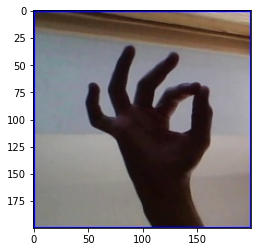

In [26]:
img1 = cv2.imread(r"C:\Users\SAYAN\Downloads\dataset1\F\F_test.jpg")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
img1 = cv2.resize(img1, (224,224))
img1 = img1.reshape(1,224,224,3)
pred = predict(img1)

print(classes[pred.argmax()])

In [78]:
import cv2


vid = cv2.VideoCapture(0)

while(True):
    ret, frame = vid.read()
    frame = cv2.rectangle(frame, (5,90), (250,390), (0,255,0), 2)
#     print(frame.shape)
    image = frame[90:390, 5:250]
    image = cv2.resize(image, (224,224))
    image = image.reshape(1,224,224,3)
    pred = predict(image)
    category = classes[pred.argmax()]
    cv2.putText(frame, category, (5,90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()